In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
# Definiowanie okresu czasowego
start_date_pre = '2021-07-01'
end_date_pre = '2022-01-01'
start_date_post = '2022-01-01'
end_date_post = '2022-07-01'

In [8]:
# Pobieranie danych Apple
apple_pre = yf.download('AAPL', start=start_date_pre, end=end_date_pre)
apple_post = yf.download('AAPL', start=start_date_post, end=end_date_post)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
# Pobieranie danych Microsoftu
microsoft_pre = yf.download('MSFT', start=start_date_pre, end=end_date_pre)
microsoft_post = yf.download('MSFT', start=start_date_post, end=end_date_post)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [10]:
# Obliczanie prostych stóp zwrotu Apple
apple_pre['Return'] = apple_pre['Adj Close'].pct_change()
apple_post['Return'] = apple_post['Adj Close'].pct_change()

In [11]:
# Obliczanie prostych stóp zwrotu Microsoftu
microsoft_pre['Return'] = microsoft_pre['Adj Close'].pct_change()
microsoft_post['Return'] = microsoft_post['Adj Close'].pct_change()

In [12]:
# Obliczanie logarytmicznych stóp zwrotu Apple
apple_pre['Log Return'] = np.log(apple_pre['Adj Close'] / apple_pre['Adj Close'].shift(1))
apple_post['Log Return'] = np.log(apple_post['Adj Close'] / apple_post['Adj Close'].shift(1))

In [13]:
# Obliczanie logarytmicznych stóp zwrotu Apple
microsoft_pre['Log Return'] = np.log(microsoft_pre['Adj Close'] / microsoft_pre['Adj Close'].shift(1))
microsoft_post['Log Return'] = np.log(microsoft_post['Adj Close'] / microsoft_post['Adj Close'].shift(1))

In [14]:
# Średnie stopy zwrotu dla Apple

print("Średnie stopy zwrotu (Apple przed kryzysem):", apple_pre['Return'].mean())
print("Średnie stopy zwrotu (Apple po kryzysie):", apple_post['Return'].mean())

Średnie stopy zwrotu (Apple przed kryzysem): 0.0021513550777900545
Średnie stopy zwrotu (Apple po kryzysie): -0.0020491492359944194


In [15]:
# Średnie stopy zwrotu dla Microsoftu

print("Średnie stopy zwrotu (Microsoft przed kryzysem):", microsoft_pre['Return'].mean())
print("Średnie stopy zwrotu (Microsoft po kryzysie):", microsoft_post['Return'].mean())

Średnie stopy zwrotu (Microsoft przed kryzysem): 0.0017917638892538958
Średnie stopy zwrotu (Microsoft po kryzysie): -0.0018680155622362211


In [16]:
# Średnie wolumeny dla Apple

print("Średnie wolumeny (Apple przed kryzysem):", apple_pre['Volume'].mean())
print("Średnie wolumeny (Apple po kryzysie):", apple_post['Volume'].mean())

Średnie wolumeny (Apple przed kryzysem): 84994436.71875
Średnie wolumeny (Apple po kryzysie): 94795952.41935484


In [17]:
# Średnie wolumeny dla Microsoftu

print("Średnie wolumeny (Microsoft przed kryzysem):", microsoft_pre['Volume'].mean())
print("Średnie wolumeny (Microsoft po kryzysie):", microsoft_post['Volume'].mean())

Średnie wolumeny (Microsoft przed kryzysem): 24367000.78125
Średnie wolumeny (Microsoft po kryzysie): 35246241.12903226


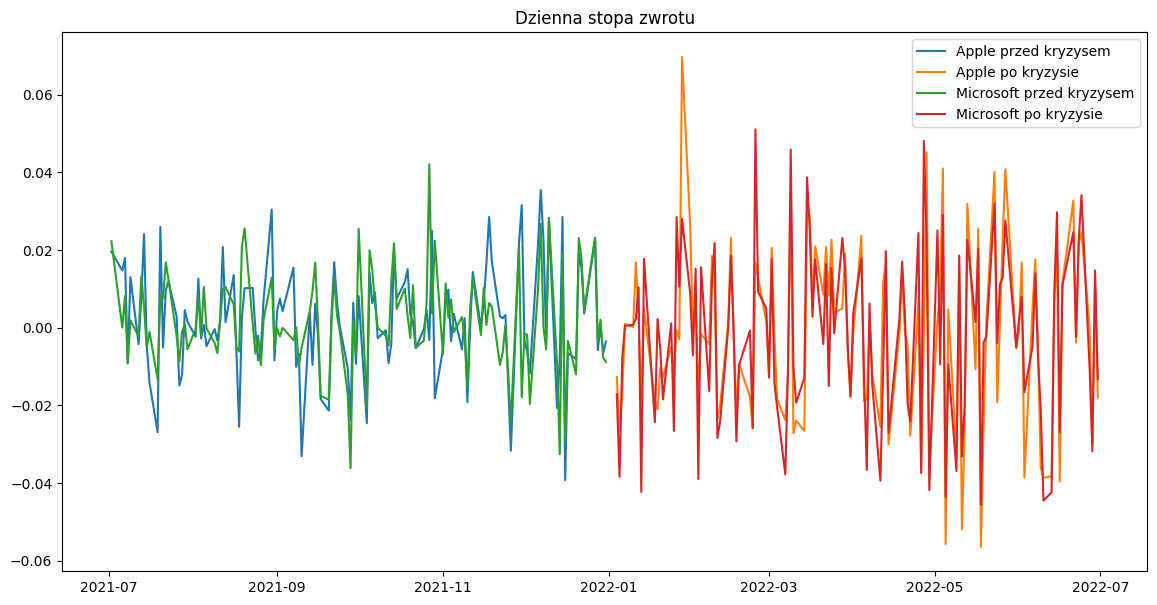

In [18]:
# Wykres stóp zwrotu
plt.figure(figsize=(14, 7))
plt.plot(apple_pre['Return'], label='Apple przed kryzysem')
plt.plot(apple_post['Return'], label='Apple po kryzysie')
plt.plot(microsoft_pre['Return'], label='Microsoft przed kryzysem')
plt.plot(microsoft_post['Return'], label='Microsoft po kryzysie')
plt.legend()
plt.title('Dzienna stopa zwrotu')
plt.show()

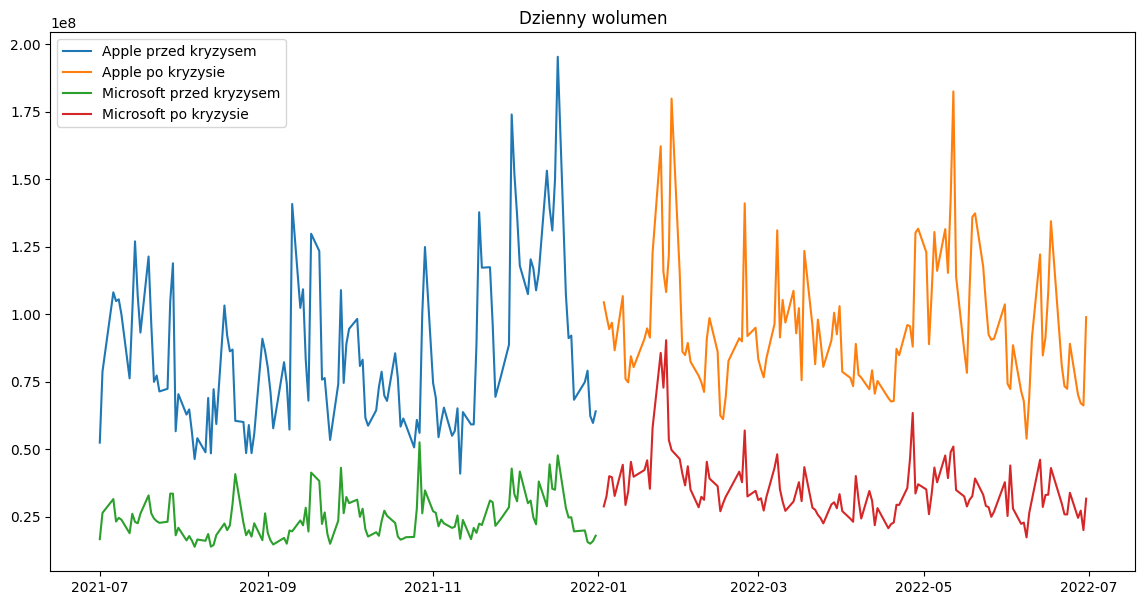

In [19]:
# Wykres wolumenu
plt.figure(figsize=(14, 7))
plt.plot(apple_pre['Volume'], label='Apple przed kryzysem')
plt.plot(apple_post['Volume'], label='Apple po kryzysie')
plt.plot(microsoft_pre['Volume'], label='Microsoft przed kryzysem')
plt.plot(microsoft_post['Volume'], label='Microsoft po kryzysie')
plt.legend()
plt.title('Dzienny wolumen')
plt.show()

In [20]:
# Test t-studenta
t_stat, p_value = stats.ttest_ind(apple_pre['Return'].dropna(), apple_post['Return'].dropna())
print("Test t-studenta dla Apple: t_stat = {}, p_value = {}".format(t_stat, p_value))

t_stat, p_value = stats.ttest_ind(microsoft_pre['Return'].dropna(), microsoft_post['Return'].dropna())
print("Test t-studenta dla Microsoft: t_stat = {}, p_value = {}".format(t_stat, p_value))

Test t-studenta dla Apple: t_stat = 1.7716083123176696, p_value = 0.07768759348041354
Test t-studenta dla Microsoft: t_stat = 1.6036159624096074, p_value = 0.11007149276993265
